# Data survey

### A Churn Prediction Model Using Random Forest: Analysis of Machine Learning Techniques for Churn Prediction and Factor Identification in Telecom Sector

-Piše se na hrvatskom ili engleskom?
-kako baratati sa podatcima u dataset_1_south_asia.csv? (podatci se podijele u više dijelova (6), pogledaj stupce, dugo traje procesiranje) Ti podatci služe samo kao validacija kako je spomenuto u članku ili?
-kako se boduje projekt?

Cilj istraživanja bio je predvidjeti na temelju podataka koji korisnici bi mogli preći na drugog mobilnog operatera i zbog kojih faktora.
Razlog je taj što je 'jeftinije' zadržati postojeće korisnike nego privući nove, te je zbog toga isplativo istražiti potencijalne korisnike koji bi mogli preći i ponuditi im neke ponude zbog kojih bi mogli ostati u postojećoj mreži.

Predloženi model za obradu podataka sastoji se od koraka:
1. Pretprocesiranje podataka (rok 9.11.) 
                      - uklanjanje šuma u podatcima, normalizacija podataka
                      - odabir važnih značajki
                      - u churn (Asia) datasetu je od 29 značajki odabrano 17
2. Klasifikacija i predkcija (rok 15.11.)
                             - na korisnike koji odlaze i one koji ostaju
                             - uz pomoć raznih algoritama - Random Tree (RT), J48, Random Forest (RF), Decision Stump,                                          AdaboostM1 Decision Stump, Bagging + Random Tree, Naïve Bayes (NB), Multilayer Perceptron (MLP),                                Logistic Regression (LR), IBKandLWL
                             -RF algoritam najuspješniji
                             -Attribute Selected Classifier za određivanje faktora za churn - lako za prikazat
...First, the decision
tree algorithm is used for classification. Random Forest, Decision Stump, J48 and Random Tree with
10-fold cross-validation.hybrid algorithms are also selected for experimentation. This includes AdaboostM1+DecisionStump and
Bagging + Random Tree algorithms. Additionally, the prediction model was also tested using the Bayes algorithm.
The classification algorithms
Random Forest (RF), Artificial Neural Networks (ANN),
decision tree, C5, Multilayer Perceptron (MLP) and Logistic Regression (LR)are also used in the simulation experiment...

3. Profiliranje (rok 18.11.)
                     -k-means algorithm sortira korisnike u kategorije: male, srednje, i riskantne (vjerovatnost prelaska)
                     -gleda se ponašanje korisnika koji su prešli, te se ustanovljuje koji trenutni korisnici imaju slično                             ponašanje (oni koji bi mogli preći)
                     


In [32]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectKBest, mutual_info_classif

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [83]:
X1 = pd.read_csv('dataset_1_south_asia.csv')
X2 = pd.read_csv('dataset_2_churn-bigml.csv')

In [84]:
print(X1.columns.values)
print(X2.columns.values)

['MSISDN' 'TOTAL_CALLS_P1' 'TOTAL_MINS_P1' 'TOTAL_CALLS_REV_P1'
 'ONNET_CALLS_P1' 'ONNET_MINS_P1' 'ONNET_REV_P1' 'OFFNET_CALLS_P1'
 'OFFNET_MINS_P1' 'OFFNET_REV_P1' 'IDD_CALLS_P1' 'IDD_MINS_P1'
 'IDD_REV_P1' 'FREE_CALLS_P1' 'FREE_MINS_P1' 'CHRGD_CALLS_P1'
 'CHRGD_MINS_P1' 'CHRGD_REV_P1' 'TOTAL_CALLS_P2' 'TOTAL_MINS_P2'
 'TOTAL_CALLS_REV_P2' 'ONNET_CALLS_P2' 'ONNET_MINS_P2' 'ONNET_REV_P2'
 'OFFNET_CALLS_P2' 'OFFNET_MINS_P2' 'OFFNET_REV_P2' 'IDD_CALLS_P2'
 'IDD_MINS_P2' 'IDD_REV_P2' 'FREE_CALLS_P2' 'FREE_MINS_P2'
 'CHRGD_CALLS_P2' 'CHRGD_MINS_P2' 'CHRGD_REV_P2' 'TOTAL_CALLS_P6'
 'TOTAL_MINS_P6' 'TOTAL_CALLS_REV_P6' 'ONNET_CALLS_P6' 'ONNET_MINS_P6'
 'ONNET_REV_P6' 'OFFNET_CALLS_P6' 'OFFNET_MINS_P6' 'OFFNET_REV_P6'
 'IDD_CALLS_P6' 'IDD_MINS_P6' 'IDD_REV_P6' 'FREE_CALLS_P6' 'FREE_MINS_P6'
 'CHRGD_CALLS_P6' 'CHRGD_MINS_P6' 'CHRGD_REV_P6' 'TOTAL_CALLS_P3'
 'TOTAL_MINS_P3' 'TOTAL_CALLS_REV_P3' 'ONNET_CALLS_P3' 'ONNET_MINS_P3'
 'ONNET_REV_P3' 'OFFNET_CALLS_P3' 'OFFNET_MINS_P3' 'OFFNET_REV_P3'
 

In [36]:
#print(X1.shape)
print(X2.shape)

#for column in X2.columns.values:
#    if(column!='state'):
#        plt.boxplot(getattr(X2,column), showfliers=False) #kako ovo?

(3333, 18)


In [37]:
X2.describe()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


In [17]:
X1.describe()

,MSISDN,TOTAL_CALLS_P1,TOTAL_MINS_P1,TOTAL_CALLS_REV_P1,ONNET_CALLS_P1,ONNET_MINS_P1,ONNET_REV_P1,OFFNET_CALLS_P1,OFFNET_MINS_P1,OFFNET_REV_P1,...,FREE_SMS_P4,REVENUE_SMS_P4,UNIQUE_SUBS_SMS_P6,TOTAL_SMS_P6,CHARGD_SMS_P6,FREE_SMS_P6,REVENUE_SMS_P6,BALANCE_END_P2,STATUS_END_P2,LAST_RCHRG_AMT
count,2.913060e+06,2.913060e+06,2.913060e+06,2.913060e+06,2.913060e+06,2.913060e+06,2.913060e+06,2.913060e+06,2.913060e+06,2.913060e+06,...,2.913060e+06,2.913060e+06,2.913060e+06,2.913060e+06,2.913060e+06,2.913060e+06,2.913060e+06,2.653070e+06,2.660236e+06,2.913060e+06
mean,3.145566e+09,2.161798e+02,7.277388e+02,2.838196e+02,1.312645e+02,6.222429e+02,7.856006e+01,8.406379e+01,1.030951e+02,1.874587e+02,...,2.320715e+02,9.400979e+00,6.321535e+01,1.540189e+03,5.929404e+01,1.480895e+03,5.685359e+01,1.764038e+01,2.253282e+00,5.761608e+01
std,5.590648e+07,3.825835e+02,2.073644e+03,5.326627e+02,3.082420e+02,2.052070e+03,1.897033e+02,1.688478e+02,2.220406e+02,3.750976e+02,...,8.633115e+02,2.649305e+01,6.937116e+02,4.964084e+03,1.593702e+02,4.924869e+03,1.309445e+02,1.038629e+02,4.361688e-01,1.071186e+02
min,3.002001e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-9.110000e+01,1.000000e+00,-2.000000e+03
25%,3.127151e+09,1.200000e+01,1.372000e+01,1.760000e+01,3.000000e+00,1.660000e+00,1.720000e+00,3.000000e+00,2.900000e+00,6.500000e+00,...,0.000000e+00,0.000000e+00,3.000000e+00,6.000000e+00,2.000000e+00,1.000000e+00,1.600000e+00,0.000000e+00,2.000000e+00,2.000000e+01
50%,3.136177e+09,7.400000e+01,1.042700e+02,1.031500e+02,2.400000e+01,2.695000e+01,2.203000e+01,2.600000e+01,2.815000e+01,5.680000e+01,...,0.000000e+00,0.000000e+00,1.200000e+01,4.600000e+01,1.400000e+01,1.300000e+01,1.440000e+01,1.550000e+00,2.000000e+00,3.000000e+01
75%,3.153020e+09,2.420000e+02,4.402900e+02,3.210000e+02,1.050000e+02,2.065100e+02,7.743000e+01,9.000000e+01,1.058600e+02,2.024000e+02,...,1.100000e+01,8.000000e+00,4.400000e+01,3.660000e+02,6.100000e+01,2.410000e+02,6.080000e+01,1.832000e+01,3.000000e+00,9.900000e+01
max,3.645916e+09,2.100700e+04,1.121461e+05,6.860983e+04,2.098800e+04,1.121137e+05,1.627517e+04,7.785000e+03,2.241463e+04,2.375840e+04,...,8.051600e+04,5.103000e+03,2.519000e+05,3.154080e+05,3.092200e+04,3.146950e+05,2.426660e+04,5.208536e+04,3.000000e+00,6.000000e+04


In [38]:
X2.nunique()
#nema monotonih atributa

State                       51
Account length             212
Area code                    3
Number vmail messages       46
Total day minutes         1667
Total day calls            119
Total day charge          1667
Total eve minutes         1611
Total eve calls            123
Total eve charge          1440
Total night minutes       1591
Total night calls          120
Total night charge         933
Total intl minutes         162
Total intl calls            21
Total intl charge          162
Customer service calls      10
Churn                        2
dtype: int64

In [19]:
X1.nunique()

MSISDN                2913060
TOTAL_CALLS_P1           4726
TOTAL_MINS_P1          389680
TOTAL_CALLS_REV_P1     199663
ONNET_CALLS_P1           4230
                       ...   
LAST_RCHRG_AMT           1211
LST_RCHRG_DATE           1344
RCHRG_AMT_EXP_DATE       1647
LST_ACTVTY_DT             184
CHURN                       2
Length: 180, dtype: int64

In [43]:
X2.columns = [c.strip().lower().replace(' ', '_') for c in X2.columns] #Preimenuj u mala slova
X2.isna().sum()
print(X2.columns.values)
#nema nedostajućih podataka

['state' 'account_length' 'area_code' 'number_vmail_messages'
 'total_day_minutes' 'total_day_calls' 'total_day_charge'
 'total_eve_minutes' 'total_eve_calls' 'total_eve_charge'
 'total_night_minutes' 'total_night_calls' 'total_night_charge'
 'total_intl_minutes' 'total_intl_calls' 'total_intl_charge'
 'customer_service_calls' 'churn']


In [31]:
X2.isna().sum()

state                     0
account_length            0
area_code                 0
number_vmail_messages     0
total_day_minutes         0
total_day_calls           0
total_day_charge          0
total_eve_minutes         0
total_eve_calls           0
total_eve_charge          0
total_night_minutes       0
total_night_calls         0
total_night_charge        0
total_intl_minutes        0
total_intl_calls          0
total_intl_charge         0
customer_service_calls    0
churn                     0
dtype: int64

Churn : F
count    2850.000000
mean        1.449825
std         1.163883
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         8.000000
Name: customer_service_calls, dtype: float64
_____________________________________________
Churn : T
count    483.000000
mean       2.229814
std        1.853275
min        0.000000
25%        1.000000
50%        2.000000
75%        4.000000
max        9.000000
Name: customer_service_calls, dtype: float64
_____________________________________________


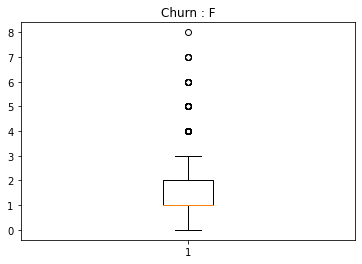

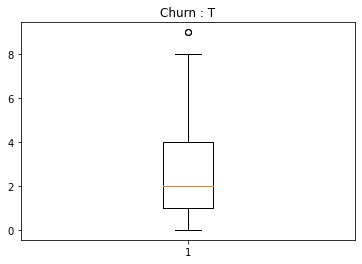

In [82]:
domena=[x for x in range(3333)]

color = lambda a : a + 10

groups = X2.groupby('churn')
a=0
for name, group in groups:
    fig1, ax1 = plt.subplots()
    ax1.set_title('Churn : '+str(name))
    ax1.boxplot(group.customer_service_calls)
    print('Churn : '+str(name))
    print(group.customer_service_calls.describe())
    print("_____________________________________________")
